Compare m26 and m22-agu models by clustring  

In [13]:
import os
import sys
import glob
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
 
## score
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import silhouette_score as sil

In [42]:
from sklearn.metrics import mutual_info_score as mi

In [2]:
sys.path.insert(1, os.path.join(sys.path[0],"/home/tkurihana/scratch-midway2/data/MOD06/" ) )
from analysis_lib import _get_swath, _load_tif_data
from analysis_lib import _get_colors, _gen_patches, _anl_agl
from analysis_lib import cluster_plotting2, cluster_plotting

In [8]:
from matplotlib import patches as mpl_patches

In [3]:
gee_datadir = '/home/tkurihana/scratch-midway2/data/GEE'
swath_filename = '2017-01-01_MOD09GA_mixed-cell.tif'
swath1 = _get_swath(gee_datadir, swath_filename)

 Shape  (2219, 4991, 7)


### m26 model

In [6]:
model_dir = '/project/foster/clouds/output/m9_26_Global_June_2015_2016/'
iteration = 160000
# encoder part
ENCODER_DEF=model_dir+'encoder.json'
ENCODER_WEIGHTS=model_dir+'encoder-'+str(iteration)+'.h5'
with open(ENCODER_DEF,"r") as f:
    encoder_m26 = tf.keras.models.model_from_json(f.read())
encoder_m26.load_weights(ENCODER_WEIGHTS)

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py:791: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


### m22-agu model

In [7]:
# encoder part
model_dir='/home/tkurihana/clouds/output/m9-22_oceans/'
ENCODER_DEF=model_dir+'encoder.json'
ENCODER_WEIGHTS=model_dir+'encoder.h5'
with open(ENCODER_DEF,"r") as f:
    encoder_m22 = tf.keras.models.model_from_json(f.read())
encoder_m22.load_weights(ENCODER_WEIGHTS)

In [20]:
def cplotting(swath,
              patches,
              patches_labels1,
              patches_labels2,
              SHAPE, 
              colors, ncluster=0
             ):
    """ 
    """
    line_width = 2
    fig = plt.figure(figsize=(14,14))
    
    # m22
    ax1 = plt.subplot(121)
    plt.imshow(swath[:,:,0], cmap="bone")
    rects = []
    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
            ax1.add_patch(mpl_patches.Rectangle(
                 (j * SHAPE[0] + line_width , i * SHAPE[1] + line_width ),
                 width=SHAPE[0] - line_width * 2,
                 height=SHAPE[1] - line_width * 2,
                 linewidth=2,
                 edgecolor=colors[patches_labels1[i,j]],
                 facecolor="none"
             ))
            centerx = SHAPE[0]*0.5*(2*j+1) #+1
            centery = SHAPE[1]*0.5*(2*i+1) #+1
            # add label as text
            plt.text(centerx, centery, str(patches_labels1[i,j]),
                    fontsize=5,weight='bold',
                    color=colors[patches_labels1[i,j]])
    ax1.set_title(" ## m22 - %d cluster ## " %ncluster, fontsize=14)
    
        
    # m22
    ax2 = plt.subplot(122)
    plt.imshow(swath[:,:,0], cmap="bone")
    rects = []
    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
            ax2.add_patch(mpl_patches.Rectangle(
                 (j * SHAPE[0] + line_width , i * SHAPE[1] + line_width ),
                 width=SHAPE[0] - line_width * 2,
                 height=SHAPE[1] - line_width * 2,
                 linewidth=2,
                 edgecolor=colors[patches_labels2[i,j]],
                 facecolor="none"
             ))
            centerx = SHAPE[0]*0.5*(2*j+1) #+1
            centery = SHAPE[1]*0.5*(2*i+1) #+1
            # add label as text
            plt.text(centerx, centery, str(patches_labels2[i,j]),
                    fontsize=5,weight='bold',
                    color=colors[patches_labels2[i,j]])
    ax2.set_title(" ## m26 - %d cluster ## " %ncluster, fontsize=14)
    
    plt.show()

In [25]:
def eplotting(swath,
              patches,
              patches_labels1,
              patches_labels2,
              SHAPE, 
              colors, ncluster=0,
              target_cluster=0
             ):
    """ 
    """
    line_width = 2
    fig = plt.figure(figsize=(14,14))
    
    # m22
    ax1 = plt.subplot(121)
    plt.imshow(swath[:,:,0], cmap="bone")
    rects = []
    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
            if patches_labels1[i,j] == target_cluster:
                ax1.add_patch(mpl_patches.Rectangle(
                 (j * SHAPE[0] + line_width , i * SHAPE[1] + line_width ),
                 width=SHAPE[0] - line_width * 2,
                 height=SHAPE[1] - line_width * 2,
                 linewidth=2,
                 edgecolor=colors[patches_labels1[i,j]],
                 facecolor="none"
                 ))
                centerx = SHAPE[0]*0.5*(2*j+1) #+1
                centery = SHAPE[1]*0.5*(2*i+1) #+1
                # add label as text
                plt.text(centerx, centery, str(patches_labels1[i,j]),
                    fontsize=5,weight='bold',
                    color=colors[patches_labels1[i,j]])
    ax1.set_title(" ## m22 - %d/%d cluster ## " %(target_cluster, ncluster), fontsize=14)
    
        
    # m22
    ax2 = plt.subplot(122)
    plt.imshow(swath[:,:,0], cmap="bone")
    rects = []
    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
            if patches_labels2[i,j] == target_cluster:
                ax2.add_patch(mpl_patches.Rectangle(
                 (j * SHAPE[0] + line_width , i * SHAPE[1] + line_width ),
                 width=SHAPE[0] - line_width * 2,
                 height=SHAPE[1] - line_width * 2,
                 linewidth=2,
                 edgecolor=colors[patches_labels2[i,j]],
                 facecolor="none"
                ))
                centerx = SHAPE[0]*0.5*(2*j+1) #+1
                centery = SHAPE[1]*0.5*(2*i+1) #+1
                # add label as text
                plt.text(centerx, centery, str(patches_labels2[i,j]),
                    fontsize=5,weight='bold',
                    color=colors[patches_labels2[i,j]])
    ax2.set_title(" ## m26 - %d/%d cluster ## " %(target_cluster, ncluster), fontsize=14)
    
    plt.show()

### Compare at n_cluster = 10

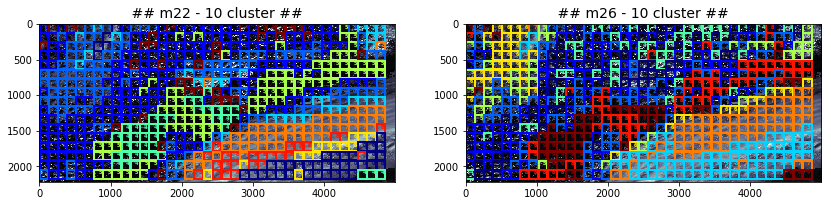

In [21]:
SHAPE = 128, 128, 7
patches = _gen_patches(swath1, normalization=True)
for icluster in [10]:
    patches_labels1 = _anl_agl(encoder_m22, patches, clusters=icluster)
    patches_labels2 = _anl_agl(encoder_m26, patches, clusters=icluster)
    colors = _get_colors(n=icluster)
    
    cplotting(swath1, patches, patches_labels1, patches_labels2,
             SHAPE, colors, ncluster=icluster
             )

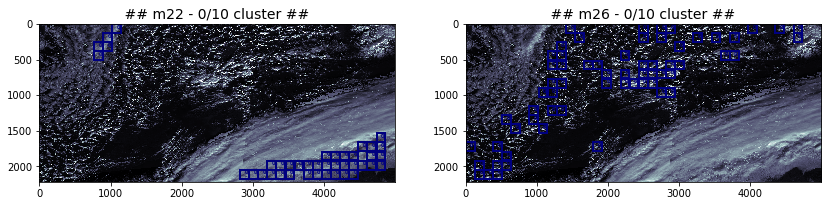

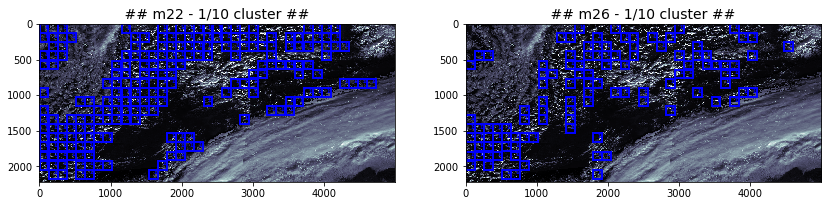

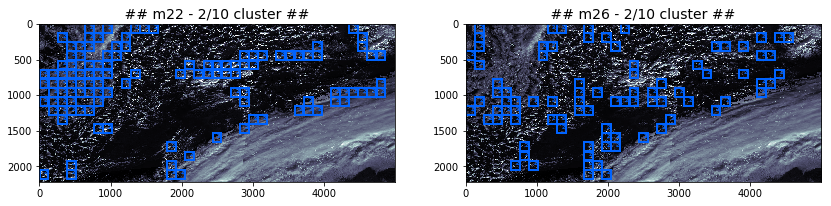

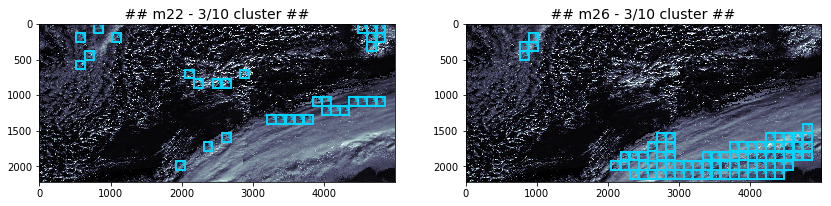

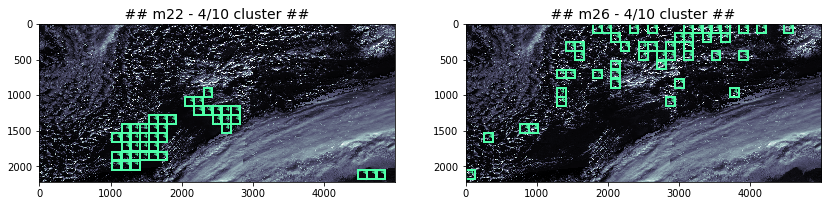

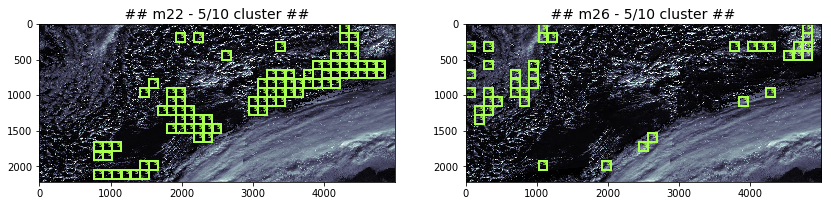

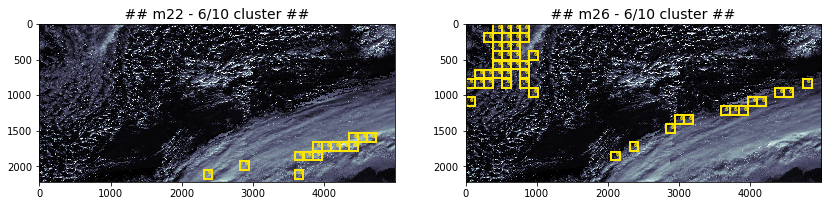

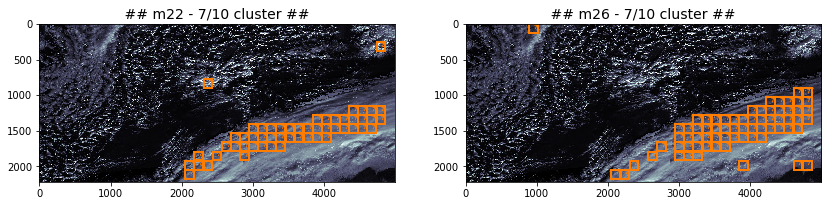

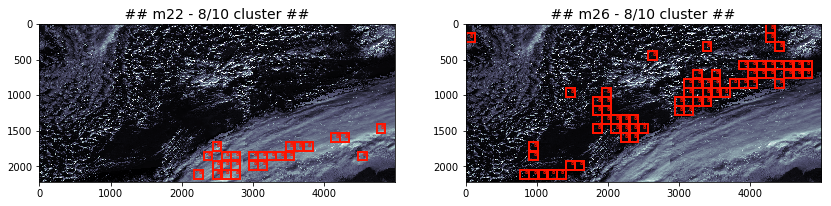

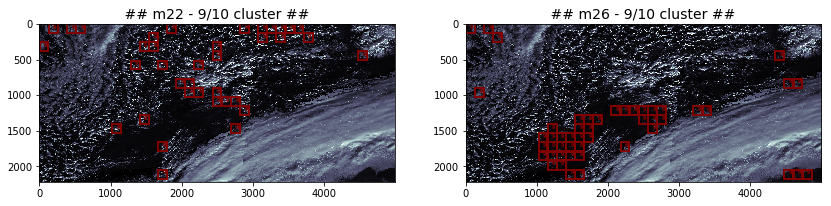

In [26]:
n_cluster = 10
for itcluster in range(n_cluster):
    eplotting(swath1, patches, patches_labels1, patches_labels2,
          SHAPE, colors, ncluster=n_cluster, target_cluster=itcluster
         )

### AMI Scores

In [33]:
SHAPE = 128, 128, 7
patches = _gen_patches(swath1, normalization=True)
amis = []
sils1 = []
sils2 = []
for icluster in [ x for x in range(2,42,2)]:
    patches_labels1 = _anl_agl(encoder_m22, patches, clusters=icluster)
    patches_labels2 = _anl_agl(encoder_m26, patches, clusters=icluster)
    colors = _get_colors(n=icluster)
    
    # encoder
    encs1 = encoder_m22.predict(patches.reshape((-1,128,128,7)))
    encs2 = encoder_m26.predict( patches.reshape((-1,128,128,7)) )
    #print(encs1.shape)
    encs_mean1 = encs1.mean(axis=(1,2))
    encs_mean2 = encs2.mean(axis=(1,2))
    
    #score
    # ++ Sil
    print("==============================")
    print("sil score m22=" , 
          sil(encs_mean1, labels=patches_labels1.flatten(), metric='euclidean'), flush=True)
    print("sil score m26=" , 
          sil(encs_mean2, labels=patches_labels2.flatten(), metric='euclidean'), flush=True)
    sils1+= [ sil(encs_mean1, labels=patches_labels1.flatten(), metric='euclidean')]
    sils2+= [ sil(encs_mean2, labels=patches_labels2.flatten(), metric='euclidean')]
    
    # ++ AMI
    print("AMI Score = %f" % (ami( patches_labels1.flatten() , patches_labels2.flatten())))
    amis += [ami( patches_labels1.flatten() , patches_labels2.flatten())]

sil score m22= 0.60074097
sil score m26= 0.27111852
AMI Score = 0.203598
sil score m22= 0.35335612
sil score m26= 0.16773115
AMI Score = 0.329179
sil score m22= 0.37017703
sil score m26= 0.12422275
AMI Score = 0.446450
sil score m22= 0.3451623
sil score m26= 0.06699941
AMI Score = 0.445946
sil score m22= 0.33347505
sil score m26= 0.047428377
AMI Score = 0.446458
sil score m22= 0.31819862
sil score m26= 0.048433788
AMI Score = 0.434144
sil score m22= 0.26881173
sil score m26= 0.050415564
AMI Score = 0.430852
sil score m22= 0.25902382
sil score m26= 0.051644813
AMI Score = 0.420949
sil score m22= 0.25900197
sil score m26= 0.05320113
AMI Score = 0.416843
sil score m22= 0.2619813
sil score m26= 0.05394017
AMI Score = 0.406591
sil score m22= 0.24307379
sil score m26= 0.055305954
AMI Score = 0.407520
sil score m22= 0.22767386
sil score m26= 0.056525424
AMI Score = 0.407001
sil score m22= 0.23652242
sil score m26= 0.05748009
AMI Score = 0.404928
sil score m22= 0.22212413
sil score m26= 0.0587

##### m26 model

Text(0.5, 0, '# nlcuster ')

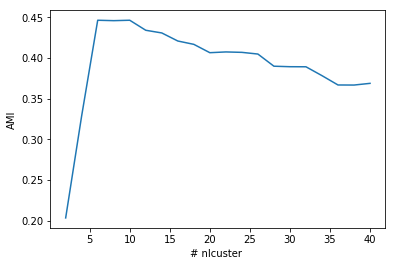

In [29]:
plt.plot([x for x in range(2,42,2)], amis)
plt.ylabel("AMI")
plt.xlabel("# nlcuster ")

Text(0.5, 0, '# nlcuster ')

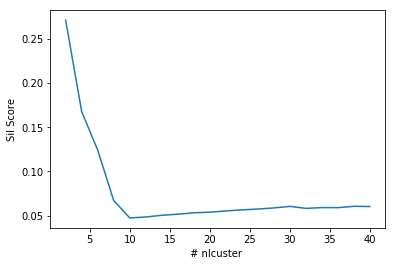

In [31]:
plt.plot([x for x in range(2,42,2)], sils)
plt.ylabel("Sil Score")
plt.xlabel("# nlcuster ")

#### m22 - m26 compare

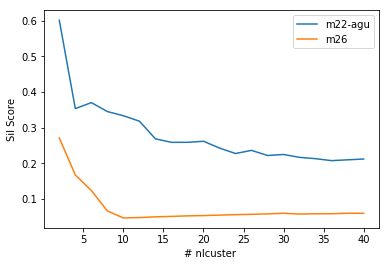

In [34]:
plt.plot([x for x in range(2,42,2)], sils1, label='m22-agu')
plt.plot([x for x in range(2,42,2)], sils2, label='m26')
plt.ylabel("Sil Score")
plt.xlabel("# nlcuster ")
plt.legend()

#### N_cluster = 4,6,8

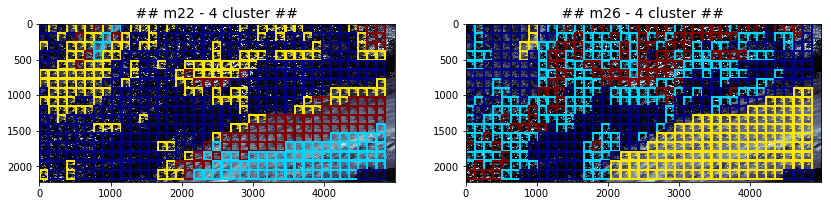

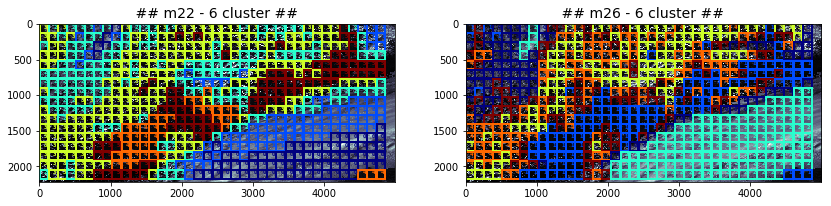

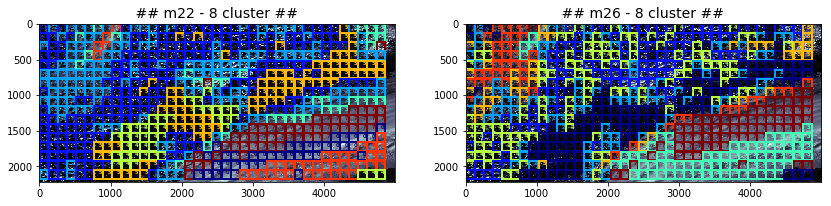

In [32]:
SHAPE = 128, 128, 7
patches = _gen_patches(swath1, normalization=True)
for icluster in [4,6,8]:
    patches_labels1 = _anl_agl(encoder_m22, patches, clusters=icluster)
    patches_labels2 = _anl_agl(encoder_m26, patches, clusters=icluster)
    colors = _get_colors(n=icluster)
    
    cplotting(swath1, patches, patches_labels1, patches_labels2,
             SHAPE, colors, ncluster=icluster
             )

#### N_Cluster = 6

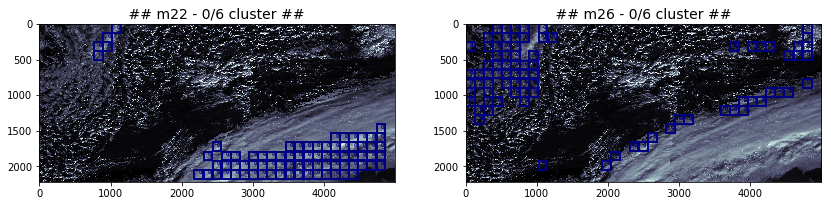

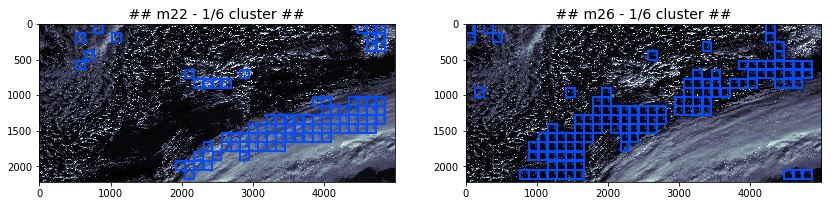

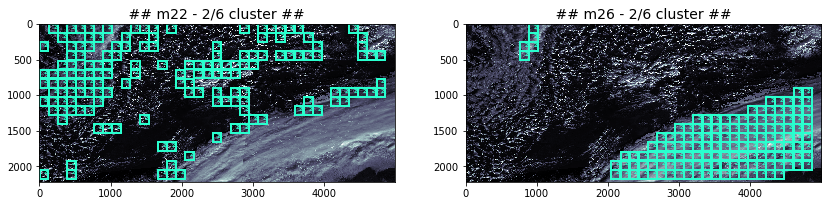

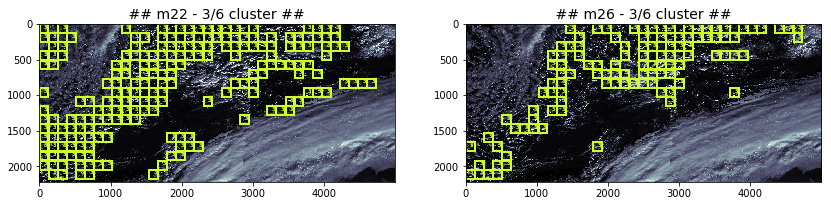

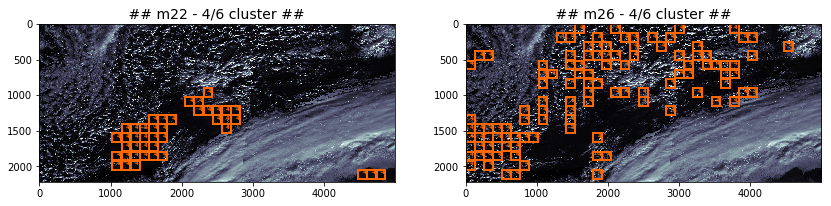

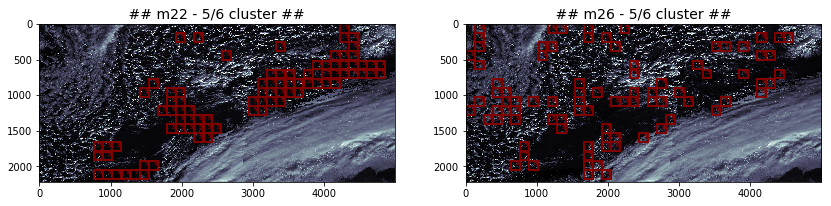

In [41]:
n_cluster = 6
colors = _get_colors(n=n_cluster)
patches_labels1 = _anl_agl(encoder_m22, patches, clusters=n_cluster)
patches_labels2 = _anl_agl(encoder_m26, patches, clusters=n_cluster)
for itcluster in range(n_cluster):  
    eplotting(swath1, patches, patches_labels1, patches_labels2,
          SHAPE, colors, ncluster=n_cluster, target_cluster=itcluster
         )

#### N_Cluster = 8

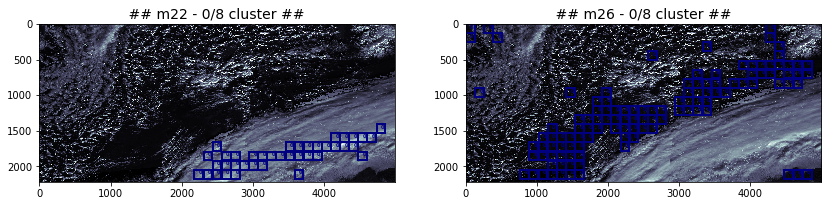

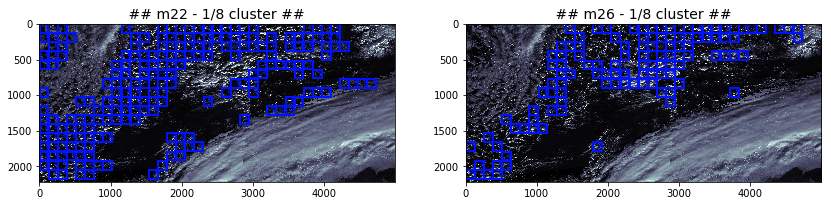

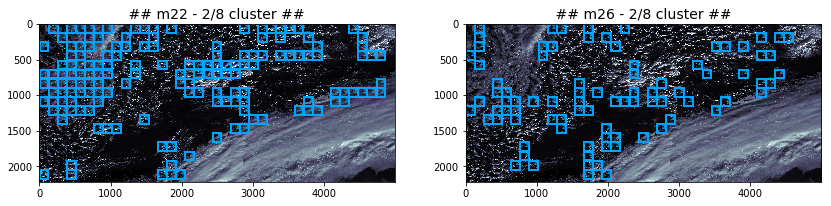

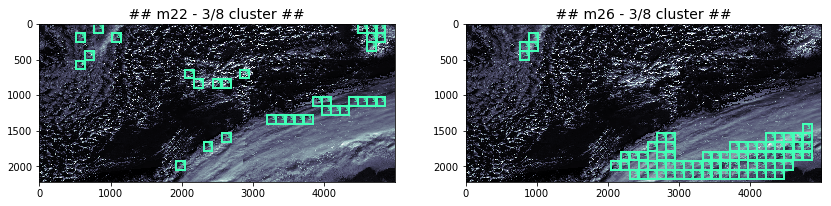

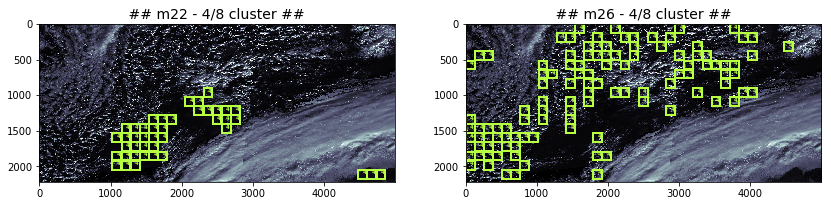

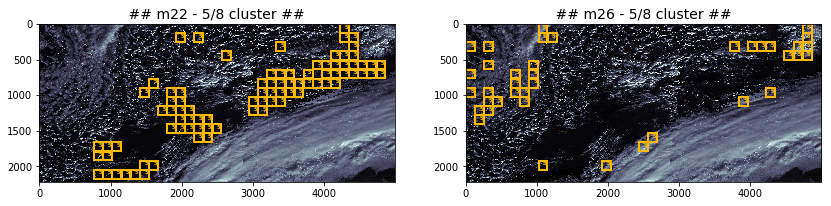

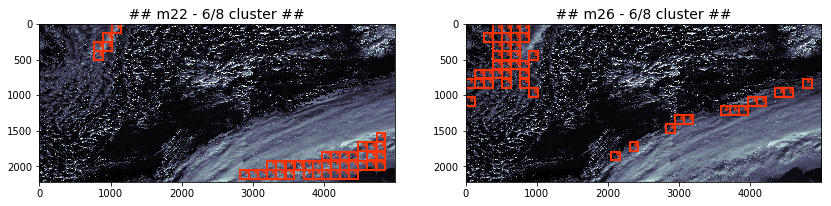

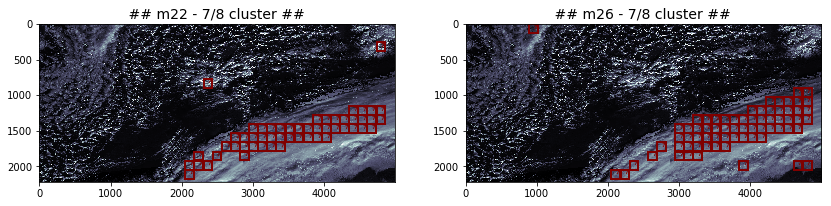

In [40]:
n_cluster = 8
colors = _get_colors(n=n_cluster)
patches_labels1 = _anl_agl(encoder_m22, patches, clusters=n_cluster)
patches_labels2 = _anl_agl(encoder_m26, patches, clusters=n_cluster)
for itcluster in range(n_cluster):  
    eplotting(swath1, patches, patches_labels1, patches_labels2,
          SHAPE, colors, ncluster=n_cluster, target_cluster=itcluster
         )

### MI Score
no adjustment

In [44]:
SHAPE = 128, 128, 7
patches = _gen_patches(swath1, normalization=True)
mis = []
for icluster in [ x for x in range(2,42,2)]:
    patches_labels1 = _anl_agl(encoder_m22, patches, clusters=icluster)
    patches_labels2 = _anl_agl(encoder_m26, patches, clusters=icluster)
    colors = _get_colors(n=icluster)
    
    # encoder
    encs1 = encoder_m22.predict(patches.reshape((-1,128,128,7)))
    encs2 = encoder_m26.predict( patches.reshape((-1,128,128,7)) )
    #print(encs1.shape)
    encs_mean1 = encs1.mean(axis=(1,2))
    encs_mean2 = encs2.mean(axis=(1,2))

    # ++ AMI
    print("AMI Score = %f  %d-cluster" % (mi( patches_labels1.flatten() , patches_labels2.flatten()), icluster) )
    mis += [mi( patches_labels1.flatten() , patches_labels2.flatten())]

AMI Score = 0.141426  2-cluster
AMI Score = 0.452324  4-cluster
AMI Score = 0.803124  6-cluster
AMI Score = 0.921825  8-cluster
AMI Score = 1.044077  10-cluster
AMI Score = 1.109657  12-cluster
AMI Score = 1.156928  14-cluster
AMI Score = 1.219346  16-cluster
AMI Score = 1.280476  18-cluster
AMI Score = 1.306331  20-cluster
AMI Score = 1.351109  22-cluster
AMI Score = 1.400786  24-cluster
AMI Score = 1.469898  26-cluster
AMI Score = 1.517338  28-cluster
AMI Score = 1.546454  30-cluster
AMI Score = 1.626875  32-cluster
AMI Score = 1.649138  34-cluster
AMI Score = 1.683228  36-cluster
AMI Score = 1.710191  38-cluster
AMI Score = 1.770274  40-cluster


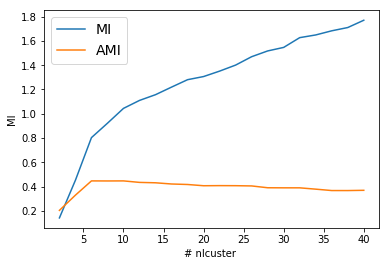

In [48]:
plt.plot([x for x in range(2,42,2)], mis, label="MI")
plt.plot([x for x in range(2,42,2)], amis, label="AMI")
plt.ylabel("MI")
plt.xlabel("# nlcuster ")
plt.legend(loc='upper left', fontsize=14)

###### 6 is interesting?